# Company Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
path = r"C:\Users\Legion\Downloads\Projects_TM\Files\Random Forest Project 9 & 10\10. Random Forests\Company_Data.csv"
df = pd.read_csv(path)

In [3]:
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


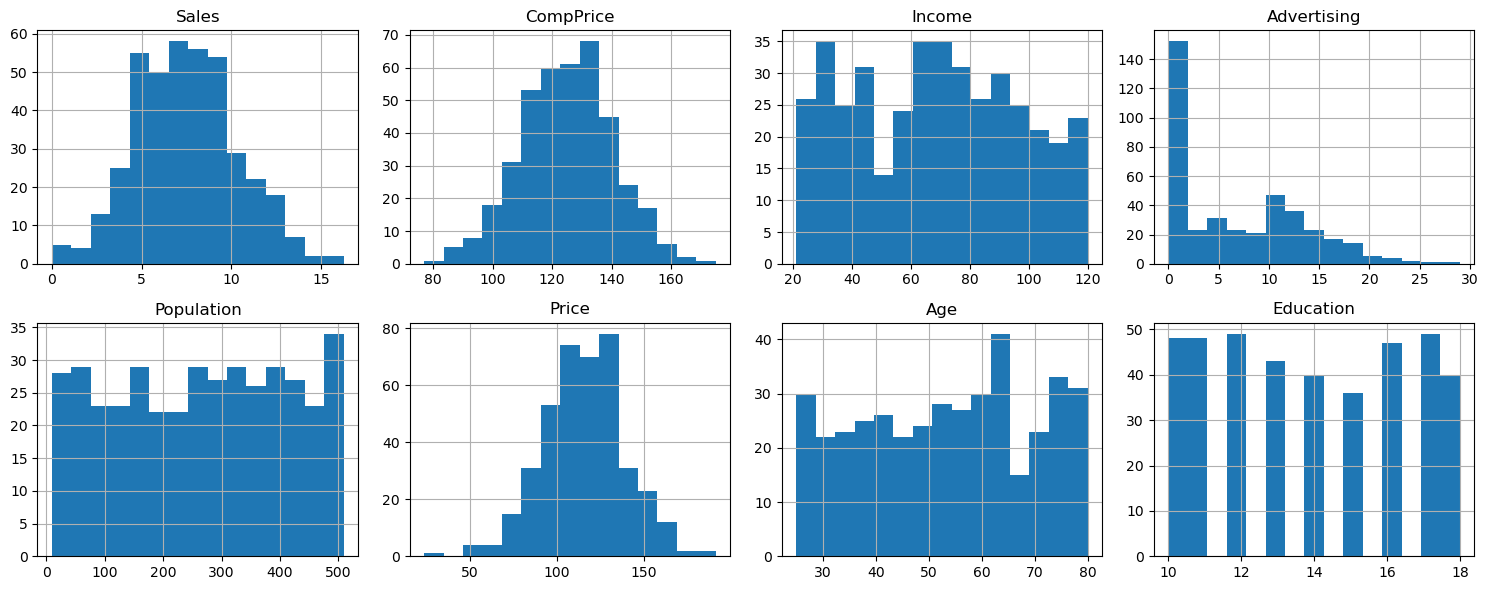

In [6]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_features].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.tight_layout()
plt.show()

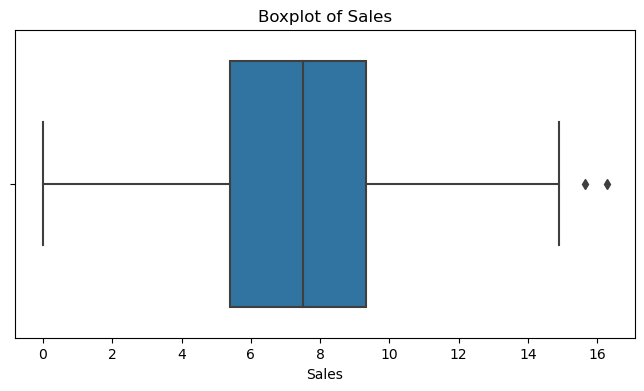

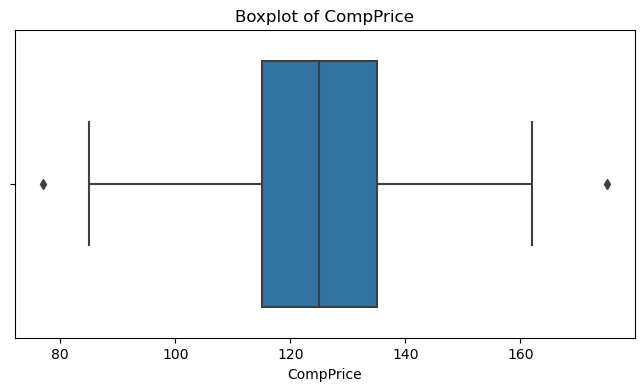

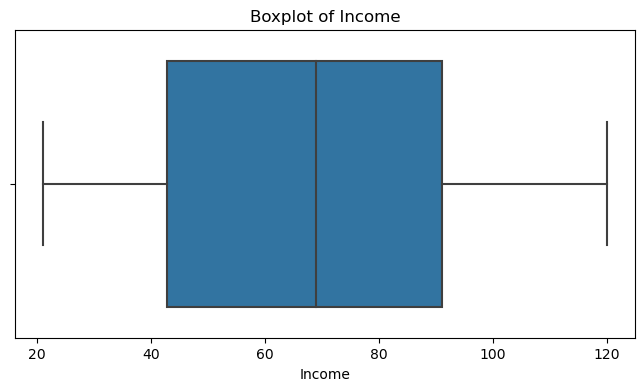

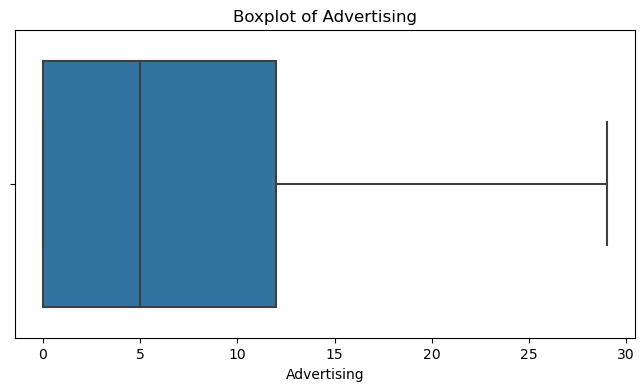

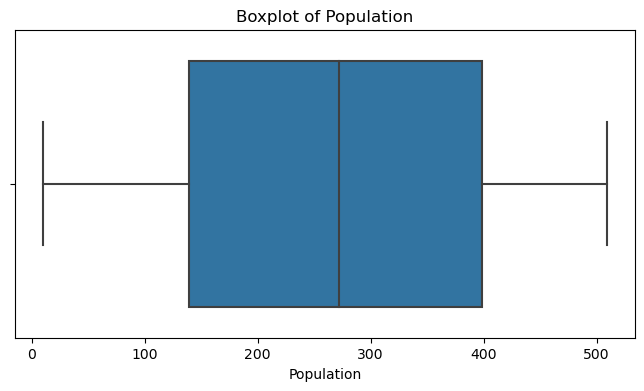

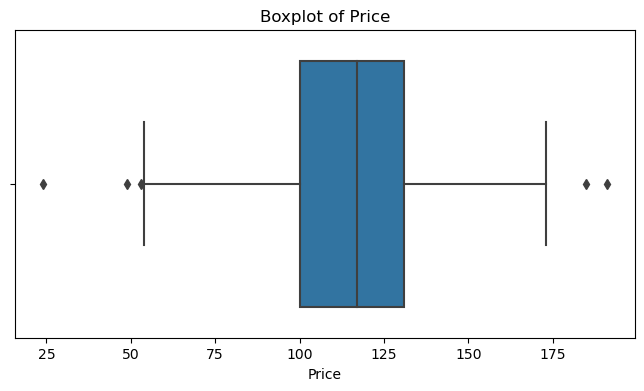

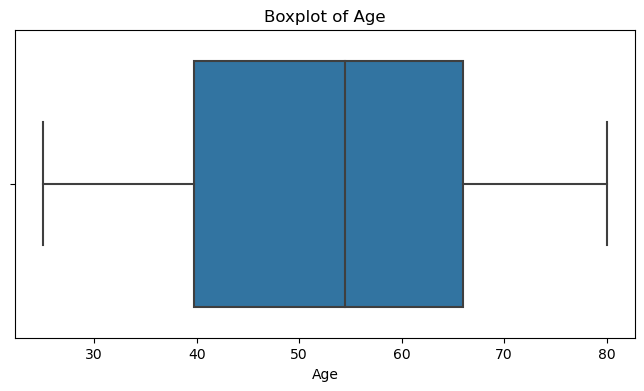

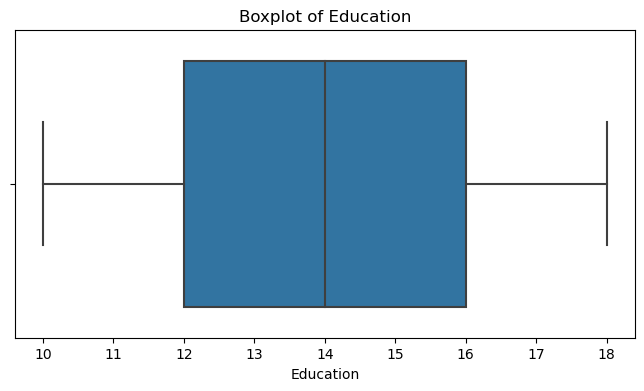

In [7]:
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.savefig(f'{col}_boxplot.png')
    plt.show()

In [8]:
df['Sales_Category'] = pd.qcut(df['Sales'], q=3, labels=['Low', 'Medium', 'High'])

In [9]:
le = LabelEncoder()
categorical_features = df.select_dtypes(include=[object]).columns.tolist()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

In [10]:
X = df.drop(['Sales', 'Sales_Category'], axis=1)
y = df['Sales_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.71      0.73      0.72        44
         Low       0.68      0.68      0.68        37
      Medium       0.58      0.56      0.57        39

    accuracy                           0.66       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.66      0.66      0.66       120



In [13]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.6583333333333333


In [14]:
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

# Fraud Check

In [15]:
path = r"C:\Users\Legion\Downloads\Projects_TM\Files\Random Forest Project 9 & 10\10. Random Forests\Fraud_check.csv"
data = pd.read_csv(path)

In [16]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [17]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [19]:
data['Income_Risk'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

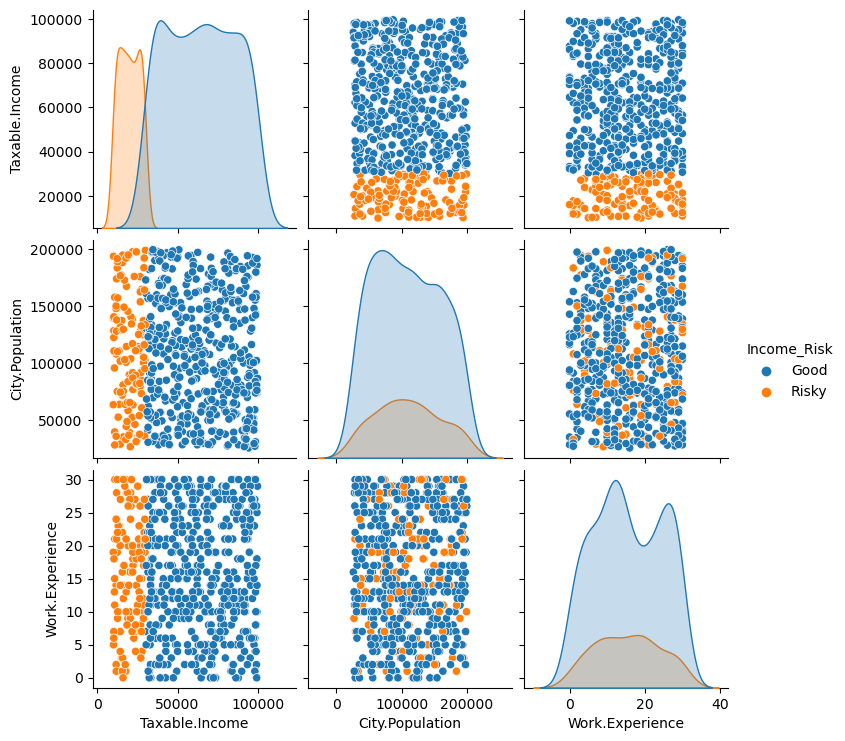

In [20]:
sns.pairplot(data, hue='Income_Risk')
plt.show()

In [21]:
le = LabelEncoder()
categorical_features = ['Undergrad', 'Marital.Status', 'Urban']
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

In [22]:
X = data.drop(['Taxable.Income', 'Income_Risk'], axis=1)
y = data['Income_Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.79      0.95      0.86       143
       Risky       0.00      0.00      0.00        37

    accuracy                           0.76       180
   macro avg       0.39      0.48      0.43       180
weighted avg       0.62      0.76      0.68       180

Accuracy Score: 0.7555555555555555


In [25]:
joblib.dump(rf, 'random_forest_fraud_model.pkl')
joblib.dump(le, 'label_encoder_fraud.pkl')

['label_encoder_fraud.pkl']